In [39]:
# импортируйте нужные библиотеки

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [40]:
# сгенерируйте линейно разделимую выборку для задачи бинарной классификации
X, y =  make_blobs(n_samples=1000, n_features=40, centers=2, cluster_std=1.5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

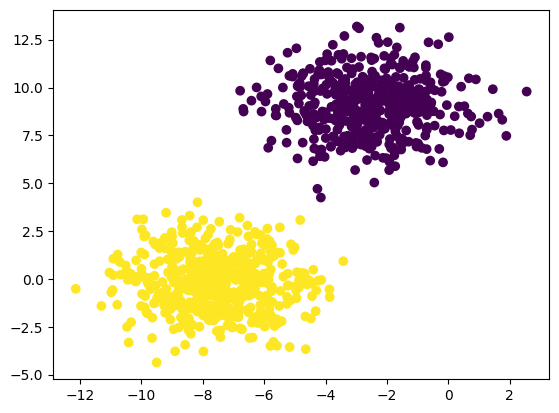

In [41]:
# отображаем выборку
X_view = np.c_[np.ones((X.shape[0])), X]
plt.scatter(X_view[:,1], X_view[:,2], marker='o', c=y)
plt.show()

# Логистическая регрессия


Конечным результатом задачи классификации является разбиение множества объектов на классы. Давайте усложним задачу и будем предсказывать не конкретные классы, а вероятности принадлежать им, например, для бинарной классификации мы будем предсказывать одно число, которое будет соответствовать вероятности принадлежать положительному классу. \
Такого результата можно достичь, если мы будем строить линейную регрессию над некоторыми признаками, а затем её результат переводить в отрезок $[0;1]$. В этом нам поможет сигмоидная функция, которая имеет вид:
<p style="text-align: center;"> $f(z) = \dfrac{1}{1 + e^{-z}}$ </p>

![sigmoid.webp](https://cmertin.github.io/images/2016/11/11_17-Loan_Approvals/Sigmoid_Function.png)
<p style="text-align: center;"></p>

Моделью логистической регрессии назовём функцию от весов и объекта вида:

<p style="text-align: center;"> $a(w, x) = \dfrac{1}{1 + e^{-w_0 - w_1x_1 + ... + w_mx_m}}$ </p>

Обучение данной модели происходит за счет кросс-энтропийной или логистическая функции потерь :
<p style="text-align: center;"> $-\sum\limits_{i=1}^{n}(y_ilog(a_i) + (1 - y_i)log(1 - a_i))$ </p>
где $a_i = a(w, x_i)$

#### Задание №1. Выведите шаг градиентного спуска для логистической функции потерь (приложить фото)

![Sol](img.jpg)

#### Задание №2. Напишите собственную логистическую регрессию

In [26]:
class MyLogRegression():

    def __init__(self):
        self._thetas = None
        self._loss = []

    def __grad(self, X, y, h):
        return (X.T @ (h - y)) / y.size

    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def __loss_func(self, h, y):
        return (-y * np.log(h + 1e-5) - (1 - y) * np.log(1 - h + 1e-5)).mean()

    def fit(self, X, y, num_iters=10000, alpha=1e-1):
        X = np.insert(X, 0, 1, axis=1)
        self._thetas = np.zeros(X.shape[1])
        self._loss = []

        for i in range(num_iters):
            h = self.__sigmoid(X @ self._thetas)
            cost = self.__loss_func(h, y)
            self._thetas -= alpha * self.__grad(X, y, h)
            self._loss.append(cost)

    def predict(self, X):
        X = np.insert(X, 0, 1, axis=1)
        proba = self.__sigmoid(X @ self._thetas)
        return np.round(proba)

#### Задание №3. Сравните свою логистическую регрессию с аналогичной моделью из sklearn на сгенерированном датасете, опираясь на Accuracy. Баллы за задание: 10 - Accuracy > 99, 5 - Accuracy > 85, 0 - иначе

In [27]:
model = MyLogRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [28]:
accuracy_score(y_test, y_pred)

1.0

In [29]:
model_sklearn = LogisticRegression().fit(X_train, y_train)
y_pred_sklearn = model_sklearn.predict(X_test)

In [31]:
accuracy_score(y_test, y_pred_sklearn)

1.0

Accuracy of my Logistic Regression: 1.0

Accuracy of scikit-learn Logistic Regression: 1.0